# Preliminary data analysis

In [1]:
import numpy as np
import pandas as pd
import os
import pickle
from joblib import Parallel, delayed
import re
import matplotlib.pyplot as plt
import seaborn as sns

d = './raw_data/'

#### Import pre-processed data

In [2]:
with open('processed_data/analysis_build.pkl', 'rb') as filename:  
    processed_data = pickle.load(filename)

#### Look a variable types

In [3]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6741 entries, 0 to 6821
Data columns (total 89 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   title                            6741 non-null   object 
 1   budget                           6741 non-null   float64
 2   worldwide_boxoffice              6741 non-null   float64
 3   domestic_boxoffice               6741 non-null   float64
 4   clean_title                      6741 non-null   object 
 5   imdb_id                          6731 non-null   object 
 6   release_date                     6741 non-null   object 
 7   year                             6741 non-null   float64
 8   top_director                     6741 non-null   object 
 9   top_cast                         6741 non-null   object 
 10  rating                           6741 non-null   float64
 11  runtime                          6741 non-null   float64
 12  original_language        

In [5]:
processed_data.describe()

,budget,worldwide_boxoffice,domestic_boxoffice,year,rating,runtime,boxoffice_corrected,is_drama,is_comedy,is_action,...,avg_rating_director_id_3,avg_rating_actor_id_1,avg_rating_actor_id_2,avg_rating_actor_id_3,avg_rating_genre_name_1,avg_rating_genre_name_2,avg_rating_genre_name_3,avg_rating_production_company_1,avg_rating_production_company_2,avg_rating_production_company_3
count,6.741000e+03,6.741000e+03,6.741000e+03,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,...,6741.0,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000
mean,3.363265e+07,9.762585e+07,4.405140e+07,2003.500964,6.444718,108.880878,0.028927,0.477822,0.359591,0.253672,...,0.0,4.538025,3.753303,3.158714,6.380879,5.576613,3.596961,4.520290,3.470860,2.297572
std,4.371985e+07,1.862460e+08,7.170556e+07,14.247345,0.872321,21.498352,0.167615,0.499545,0.479916,0.435144,...,0.0,3.070388,3.244568,3.257697,0.512922,2.205377,3.196803,2.993843,3.257943,3.109355
min,6.000000e+03,3.000000e+01,0.000000e+00,1915.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.500000e+06,7.847000e+06,3.444895e+06,1998.000000,5.920000,95.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,6.202111,6.174464,0.000000,0.000000,0.000000,0.000000
50%,1.800000e+07,3.189725e+07,1.920274e+07,2006.000000,6.500000,105.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,6.275100,5.900000,0.000000,6.374738,6.341584,6.160592,6.232238,5.775000,0.000000
75%,4.000000e+07,1.022366e+08,5.342468e+07,2013.000000,7.000000,119.000000,0.000000,1.000000,1.000000,1.000000,...,0.0,6.735000,6.600000,6.463333,6.558028,6.549404,6.417160,6.570528,6.500000,6.247516
max,4.000000e+08,2.748243e+09,9.366622e+08,2025.000000,10.000000,339.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,8.700000,8.566000,8.708000,8.300000,8.500000,8.020667,8.538000,8.600000,8.467000


## EDA of numerical data

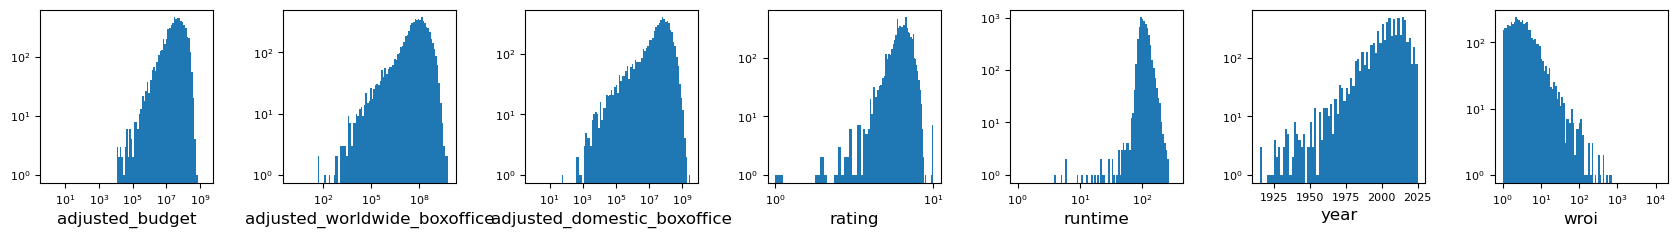

In [22]:
# Inspect distribution of observables
select_vars = ['adjusted_budget', 'adjusted_worldwide_boxoffice', 'adjusted_domestic_boxoffice', 'rating', 'runtime', 'year', 'wroi']
fig, axs = plt.subplots(1, len(select_vars), figsize=(3*len(select_vars), 3), sharex=False, sharey=False)

for i, var in enumerate(select_vars):
    axs[i].hist(processed_data[var], bins=np.logspace(0,np.log10(np.amax(processed_data[var])), 100) if var not in ['rating', 'release_date', 'year'] else 'auto', log = True);
    if var not in ['final_rating', 'release_date', 'year']:
        axs[i].semilogx()
    axs[i].minorticks_off()
    axs[i].yaxis.set_tick_params(labelbottom=True)
    axs[i].xaxis.set_tick_params(labelbottom=True)
    axs[i].tick_params(axis='both', which='major', labelsize=8)
    axs[i].set_box_aspect(1)
    axs[i].set_xlabel(var, fontsize = 12)

fig.subplots_adjust(wspace=.4, hspace=.35)

np.int64(92)

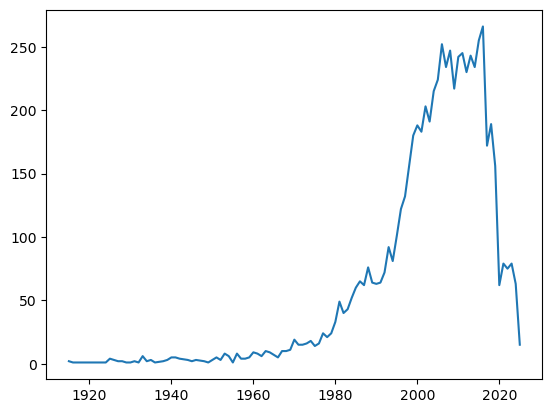

In [23]:
input_data = processed_data.groupby(['year'], as_index = False).count()
plt.plot(input_data.year, input_data.title)
np.argmax(input_data.title)

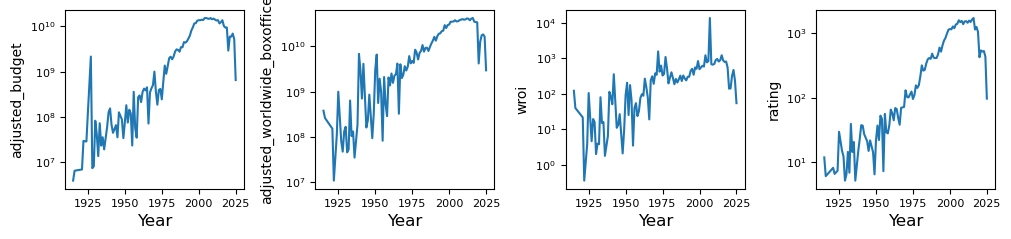

In [24]:
# Inspect distribution of observables
fig, axs = plt.subplots(1, 4, figsize=(3*4, 3), sharex=False, sharey=False)
input_data = processed_data[['adjusted_budget', 'adjusted_worldwide_boxoffice', 'wroi', 'rating', 'year']].groupby(['year'], as_index = False).sum()

for i, var in enumerate(['adjusted_budget', 'adjusted_worldwide_boxoffice', 'wroi', 'rating']):
    axs[i].plot(input_data['year'], input_data[var]);
    axs[i].semilogy()
    axs[i].minorticks_off()
    axs[i].yaxis.set_tick_params(labelbottom=True)
    axs[i].xaxis.set_tick_params(labelbottom=True)
    axs[i].tick_params(axis='both', which='major', labelsize=8)
    axs[i].set_box_aspect(1)
    axs[i].set_ylabel(var, fontsize = 10)
    axs[i].set_xlabel('Year', fontsize = 12)

fig.subplots_adjust(wspace=.4, hspace=.35)

Thinking of limiting the data to 1995 - 2018.

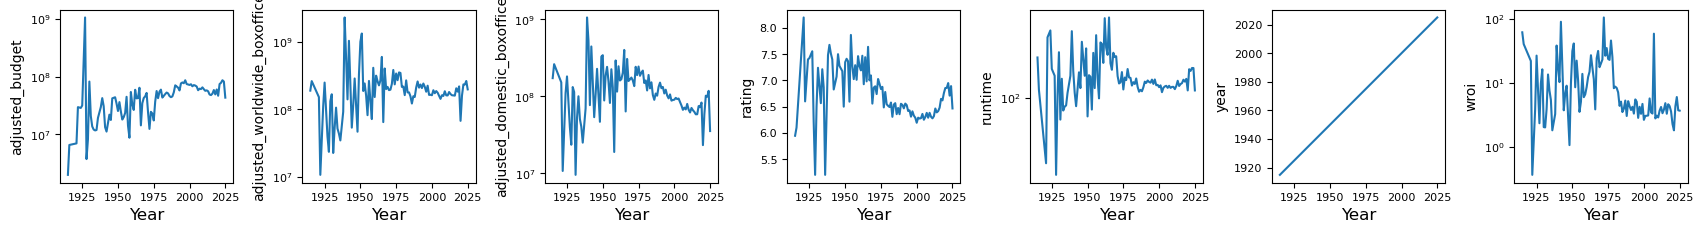

In [25]:
# Inspect distribution of observables
fig, axs = plt.subplots(1, len(select_vars), figsize=(3*len(select_vars), 3), sharex=False, sharey=False)
input_data = processed_data[select_vars].groupby(['year'], as_index = False).mean()

for i, var in enumerate(select_vars):
    axs[i].plot(input_data['year'], input_data[var]);
    if var not in ['rating', 'release_date', 'year']:
        axs[i].semilogy()
    axs[i].minorticks_off()
    axs[i].yaxis.set_tick_params(labelbottom=True)
    axs[i].xaxis.set_tick_params(labelbottom=True)
    axs[i].tick_params(axis='both', which='major', labelsize=8)
    axs[i].set_box_aspect(1)
    axs[i].set_ylabel(var, fontsize = 10)
    axs[i].set_xlabel('Year', fontsize = 12)

fig.subplots_adjust(wspace=.4, hspace=.35)

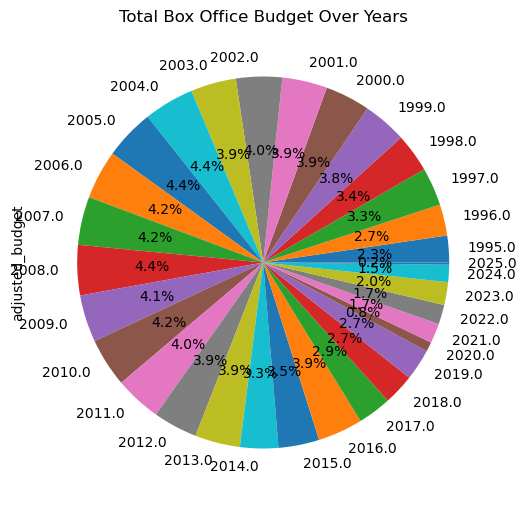

In [12]:
processed_data.loc[(processed_data.year >= 1995)*(processed_data.year <= 2025)].groupby("year")["adjusted_budget"].sum().plot(kind="pie", figsize=(6,10), title="Total Box Office Budget Over Years", autopct='%1.1f%%')  
plt.show()

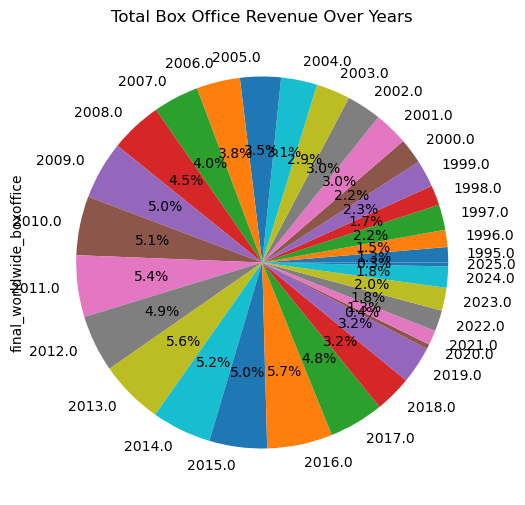

In [10]:
processed_data.loc[(processed_data.year >= 1995)*(processed_data.year <= 2025)].groupby("year")["final_worldwide_boxoffice"].sum().plot(kind="pie", figsize=(6,10), title="Total Box Office Revenue Over Years", autopct='%1.1f%%')  
plt.show()

#### Correlations in numeric data

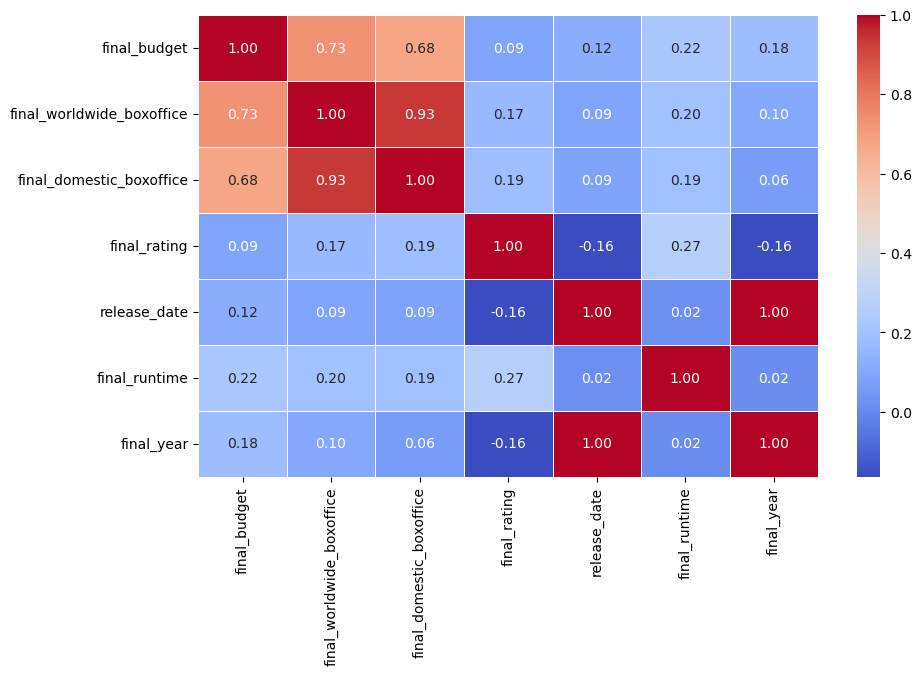

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(processed_data.loc[processed_data.final_budget >= 1000, select_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, ax=ax)
plt.show()

## EDA of categorical data

In [12]:
from ast import literal_eval
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49866 entries, 0 to 49865
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   final_title                 49866 non-null  object        
 1   final_budget                13828 non-null  float64       
 2   final_worldwide_boxoffice   12689 non-null  float64       
 3   final_domestic_boxoffice    15047 non-null  float64       
 4   final_genres                46160 non-null  object        
 5   final_runtime               44332 non-null  float64       
 6   final_overview              44670 non-null  object        
 7   final_certificate           22650 non-null  object        
 8   final_original_language     45277 non-null  object        
 9   final_rating                45288 non-null  float64       
 10  final_clean_title           49866 non-null  object        
 11  final_production_countries  45288 non-null  object    

In [13]:
features = ['cast', 'crew', 'final_genres', 'final_production_countries', 'production_companies']
for feature in features:
    processed_data.loc[:, feature] = processed_data[feature].fillna("")
    processed_data.loc[processed_data['_merge'] != 'right_only', feature] = processed_data.loc[processed_data['_merge'] != 'right_only', feature].apply(literal_eval)

In [14]:
# Functions to extract the directors name from crew, and get top 3 crew members from crew
def get_director(x):
    for i in x:
        if i['job'] == "Director":
            return i['name']

    return np.nan

def get_list(x):
    if isinstance(x, list):
        entries = [i['name'] for i in x]
        # keep only top 3 entries
        if len(entries) > 3:
            entries = entries[:3]
        return entries

    return np.nan

def get_entry(x, entry = 'name', rank = 0):
    if isinstance(x, list):
        entries = [i[entry] for i in x]
        # keep only top 3 entries
        if len(entries) > rank:
            out = entries[rank]
        else:
            out = np.nan
        return out

    return np.nan

In [25]:
processed_data['star'][8]

'Geoffrey Rush, \nAnthony LaPaglia, \nSamuel Johnson, \nBarry Otto'

In [22]:
processed_data['director_id']

0                     NaN
1                     NaN
2                     NaN
3        /name/nm0836964/
4        /name/nm5056902/
               ...       
49861                 NaN
49862    /name/nm0840671/
49863    /name/nm1066739/
49864    /name/nm0001429/
49865                 NaN
Name: director_id, Length: 49866, dtype: object

In [15]:
processed_data.loc[:, 'final_director'] = processed_data['crew'].apply(get_director).fillna(processed_data['director'])

for feature in ['cast', 'final_genres']:
    processed_data.loc[:, 'top_'+feature] = processed_data[feature].apply(get_list)

for i in np.arange(0,3):
    processed_data.loc[:, 'actor_name'+str(i)] = processed_data['cast'].apply(get_entry, args = (['name', i]))
    processed_data.loc[:, 'actor_id_'+str(i)] = processed_data['cast'].apply(get_entry, args = (['id', i]))
    processed_data.loc[:, 'genre_name'+str(i)] = processed_data['final_genres'].apply(get_entry, args = (['name', i]))
    processed_data.loc[:, 'production_country_'+str(i)] = processed_data['final_production_countries'].apply(get_entry, args = (['name', i]))
    processed_data.loc[:, 'production_company_'+str(i)] = processed_data['production_companies'].apply(get_entry, args = (['name', i]))

In [18]:
# !pip install ydata_profiling

# from ydata_profiling import ProfileReport

ImportError: Numba needs NumPy 2.1 or less. Got NumPy 2.2.

In [ ]:
profile = ProfileReport(processed_data, title="Movie Dataset Profiling Report")
profile.to_file("movie_data_report.html")